In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [3]:
df = pd.read_excel("jogo.xlsx")

In [4]:
df = df.fillna(0)

In [5]:
deletar = df.loc[((df.Global_Sales.fillna(0)) == 0) & ((df.Total_Shipped.fillna(0)) == 0)]
a = deletar.index
dados = df.drop(a)

In [6]:
dados["Sales"] = dados["Global_Sales"].fillna(0) + dados["Total_Shipped"].fillna(0)

In [7]:
dados = dados.drop(columns = ["Global_Sales","Total_Shipped","url","status","img_url","NA_Sales" ,"PAL_Sales","JP_Sales" ,"Other_Sales","VGChartz_Score"])


In [8]:
limpa = dados.loc[((dados.Sales != 0 ) & (dados.Critic_Score != 0))]
limpa

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Year,Last_Update,Vgchartzscore,Sales
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,7.7,0.0,2006.0,0,0.0,82.86
1,2,Super Mario Bros.,super-mario-bros,Platform,0,NES,Nintendo,Nintendo EAD,10.0,0.0,1985.0,0,0.0,40.24
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,8.2,9.1,2008.0,11th Apr 18,8.7,37.14
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,8.0,8.8,2009.0,0,8.8,33.09
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,9.4,0.0,1998.0,0,0.0,31.38
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,9.1,8.1,2006.0,0,0.0,30.80
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,8.6,9.2,2009.0,0,9.1,30.22
9,10,Minecraft,minecraft,Misc,0,PC,Mojang,Mojang AB,10.0,0.0,2010.0,05th Aug 18,0.0,30.01
11,12,Wii Play,wii-play,Misc,E,Wii,Nintendo,Nintendo EAD,5.9,4.5,2007.0,0,5.3,28.02
12,13,Kinect Adventures!,kinect-adventures,Party,E,X360,Microsoft Game Studios,Good Science Studio,6.7,0.0,2010.0,29th Sep 18,6.2,24.00


In [9]:

from sklearn.linear_model import SGDRegressor

In [10]:
fitter = SGDRegressor(loss="squared_loss", penalty=None)

In [11]:
X = limpa.as_matrix(columns=["Critic_Score"]) 


C:\Users\pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
X

array([[ 7.7],
       [10. ],
       [ 8.2],
       ...,
       [ 6.7],
       [ 7. ],
       [ 7. ]])

In [13]:
y = limpa["Sales"].tolist()

In [14]:
fitter.fit(X, y)

C:\Users\pedro\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [15]:
fitter.predict([[5]])

array([0.38449559])

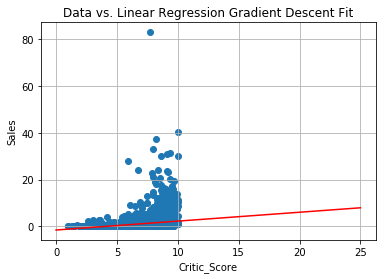

In [22]:
import snips as snp


xs = list(range(0, 26, 1))
xs = np.array(xs).reshape(-1, 1)

new_ys = fitter.predict(xs)

fig, ax = plt.subplots()
ax.scatter(limpa["Critic_Score"], limpa["Sales"])
plt.xlabel("Critic_Score")
plt.ylabel("Sales")
plt.title("Data vs. Linear Regression Gradient Descent Fit")
plt.grid(True)
ax.plot(xs, new_ys, color="red")

